In [1]:
#GOAL: use only training df to do a train test split. do a confusion matrix, look at accuracy of the model
#import standard packages
import pandas as pd
import numpy as np

In [2]:
# mport the random forest package # it's the best model used so far but i want to prove that
from sklearn.ensemble import RandomForestClassifier

In [3]:
#import logistic reg as well
from sklearn.linear_model import LogisticRegression

In [4]:
#import log loss
#Log Loss quantifies the accuracy of a classifier by penalising false classifications. Minimising the Log Loss = maximising the accuracy of the classifier, but 
#the classifier must assign a probability to each class
from sklearn.metrics import log_loss  

In [5]:
%matplotlib inline

from matplotlib import pyplot as plt

#import metrics
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import train_test_split
from sklearn import cross_validation
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [6]:
#load the cleaned training values
train = pd.read_csv('cleaned.csv')

In [7]:
#fill NaN values with the mean
train["construction_year"].fillna(train["construction_year"].mean(), inplace=True)
train["operation_year"].fillna(train["operation_year"].mean(), inplace=True)


In [8]:
# map each outcome to a number
train['status_group'] = train.status_group.map({'functional':0, 'functional needs repair':1, 'non functional':2})

In [9]:
#define feature columns
feature_columns = [
 'amount_tsh',
 'gps_height',
 'longitude',
 'latitude',
 'region_code',
 'district_code',
 'population',
 'construction_year',
 'operation_year', 
 'season']

In [10]:
#take the status group off - this is the outcome i am predicting
y = train.pop('status_group')
X = train[feature_columns]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
X_train.shape, y_train.shape

((47520, 10), (47520,))

In [12]:
X_test.shape, y_test.shape

((11880, 10), (11880,))

In [13]:
#try with logistic regression to establish a baseline
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [14]:
scores = cross_validation.cross_val_score(model, X_train, y_train, cv=10)
scores

array([ 0.59970551,  0.59381573,  0.59238215,  0.58712121,  0.59532828,
        0.58101852,  0.58577142,  0.59250684,  0.58913913,  0.59398021])

In [15]:
print("Accuracy: %1.3f (+/- %1.3f)" % (scores.mean(), scores.std()*2))

Accuracy: 0.591 (+/- 0.010)


In [16]:
y_pred = model.predict(X_test)

In [17]:
accuracy_score(y_test, y_pred)

0.59217171717171713

In [18]:
y_test_proba = model.predict_proba(X_test)

In [19]:
log_loss(y_test, y_test_proba)

0.83745664023288036

In [20]:
print(classification_report(y_test, y_pred))
print("Accuracy: %1.3f" % accuracy_score(y_test, y_pred))
#this throws a warning - will ignore for now as I don't plan to use this as my final model

             precision    recall  f1-score   support

          0       0.59      0.90      0.71      6457
          1       0.00      0.00      0.00       851
          2       0.60      0.26      0.37      4572

avg / total       0.55      0.59      0.53     11880

Accuracy: 0.592


C:\Users\julia.dills\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1074: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [21]:
#try with random forest
model = RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [22]:
scores = cross_validation.cross_val_score(model, X_train, y_train, cv=10)
scores

array([ 0.69962137,  0.70151451,  0.70496633,  0.70265152,  0.70159933,
        0.69570707,  0.70111555,  0.71037676,  0.70469375,  0.70448327])

In [23]:
print("Accuracy: %1.3f (+/- %1.3f)" % (scores.mean(), scores.std()*2))

Accuracy: 0.703 (+/- 0.007)


In [24]:
y_pred = model.predict(X_test)

In [25]:
accuracy_score(y_test, y_pred)

0.71077441077441073

In [26]:
log_loss(y_test, y_test_proba)
#want to minimize the log loss - this isn't that much of an improvement in this case

0.83745664023288036

In [27]:
print(classification_report(y_test, y_pred))
print("Accuracy: %1.3f" % accuracy_score(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.73      0.82      0.77      6457
          1       0.41      0.27      0.33       851
          2       0.72      0.64      0.68      4572

avg / total       0.70      0.71      0.70     11880

Accuracy: 0.711


In [28]:
#try with random forest but specify n_estimators 100
model = RandomForestClassifier(n_estimators = 100)
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [29]:
scores = cross_validation.cross_val_score(model, X_train, y_train, cv=10)
scores

array([ 0.7189735 ,  0.7177114 ,  0.71864478,  0.71527778,  0.71506734,
        0.70896465,  0.7122711 ,  0.7204799 ,  0.7251105 ,  0.71121869])

In [30]:
print("Accuracy: %1.3f (+/- %1.3f)" % (scores.mean(), scores.std()*2))

Accuracy: 0.716 (+/- 0.009)


In [31]:
y_pred = model.predict(X_test)

In [32]:
accuracy_score(y_test, y_pred)

0.72289562289562292

In [33]:
log_loss(y_test, y_test_proba)
#want to minimize the log loss - this isn't that much of an improvement in this case either

0.83745664023288036

In [34]:
print(classification_report(y_test, y_pred))
print("Accuracy: %1.3f" % accuracy_score(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.74      0.81      0.78      6457
          1       0.45      0.27      0.34       851
          2       0.72      0.68      0.70      4572

avg / total       0.71      0.72      0.72     11880

Accuracy: 0.723


Confusion matrix, without normalization
[[5258 1033  166]
 [1359 3098  115]
 [ 442  177  232]]
Normalized confusion matrix
[[ 0.81  0.16  0.03]
 [ 0.3   0.68  0.03]
 [ 0.52  0.21  0.27]]


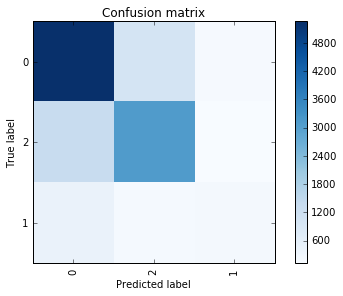

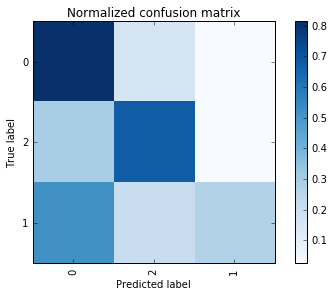

In [35]:
labels = y.unique()

def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=90)
    plt.yticks(tick_marks, labels)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=labels)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure()
plot_confusion_matrix(cm)

#     print('Iteration %i %s' % (i, 70 * '_'))
#     print("Label Spreading model: %d labeled & %d unlabeled (%d total)"
#           % (n_labeled_points, n_total_samples - n_labeled_points, n_total_samples))

#data should be NORMALIZED to bring all of the variables into proportion with one another
# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
plt.figure()
plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

plt.show()

In [36]:
#this shows that the model is best at predicting if a water pump is functional, followed by non functional, followed by needs repair
#the model fails at needs repair because you can see it is predicting that more of these values are functional rather than in need of repair

In [37]:
#am not going to run the cross_val_score because it is taking too long

In [38]:
#look at feature importance
importances = model.feature_importances_
importances

array([ 0.05,  0.12,  0.28,  0.28,  0.03,  0.03,  0.08,  0.06,  0.06,  0.02])

In [39]:
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))


Feature ranking:
1. feature 2 (0.282719)
2. feature 3 (0.276939)
3. feature 1 (0.116358)
4. feature 6 (0.076083)
5. feature 7 (0.059921)
6. feature 8 (0.056240)
7. feature 0 (0.053868)
8. feature 5 (0.033572)
9. feature 4 (0.028304)
10. feature 9 (0.015995)


In [40]:
#in order: 
#2-longitude, 3-latitude, 1-elevation, 6-population
#7-construction year, 8-operation year, 0-free/not free (amt tsh)
#5-district, 6-region, 9-season


In [41]:
#looking forward to factorizing additional categorical variables and improving the model.
#will probably continue to use rfc as model